In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#import pandas and read the dataset

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/PhishingDetectionModel/Phishing Detection Model/dataset.csv')

In [10]:
#filter rows with missing values
data = data.dropna(axis=0)

In [11]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [12]:
#select features to work with
features = ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT']

X = data[features]

#Choosing target label
y = data.CLASS_LABEL

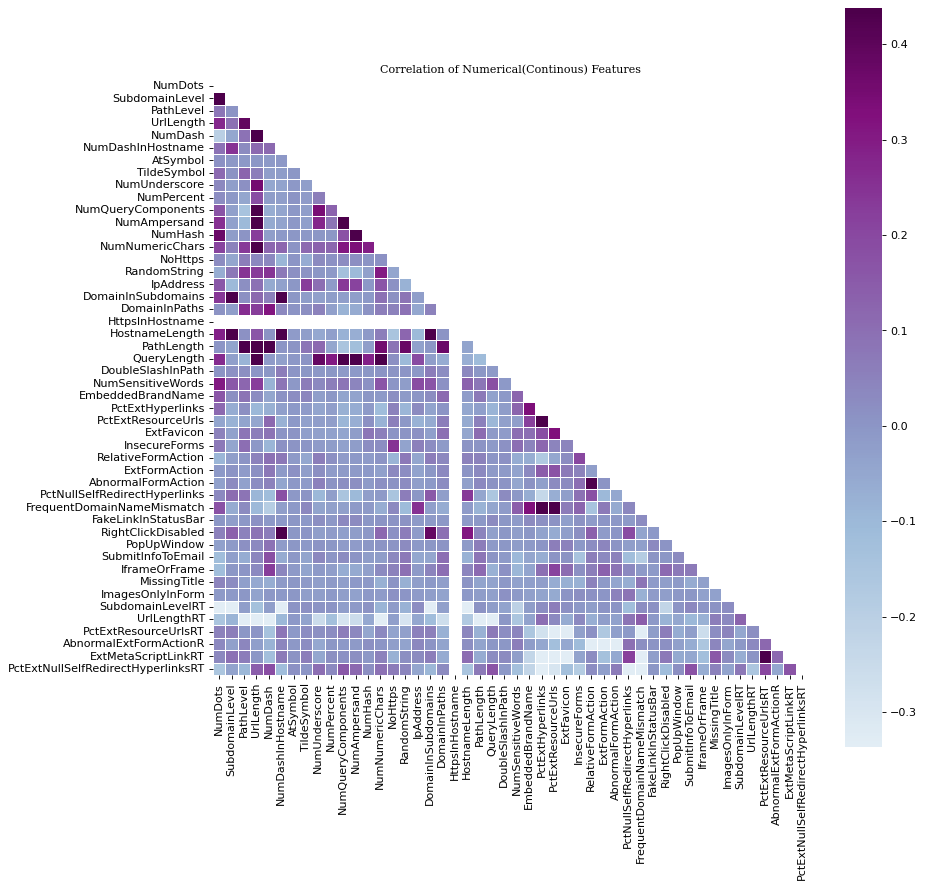

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Taking all columns except URL
corr = data[features].corr()

fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical(Continous) Features', fontsize=15,font="Serif")
plt.show()

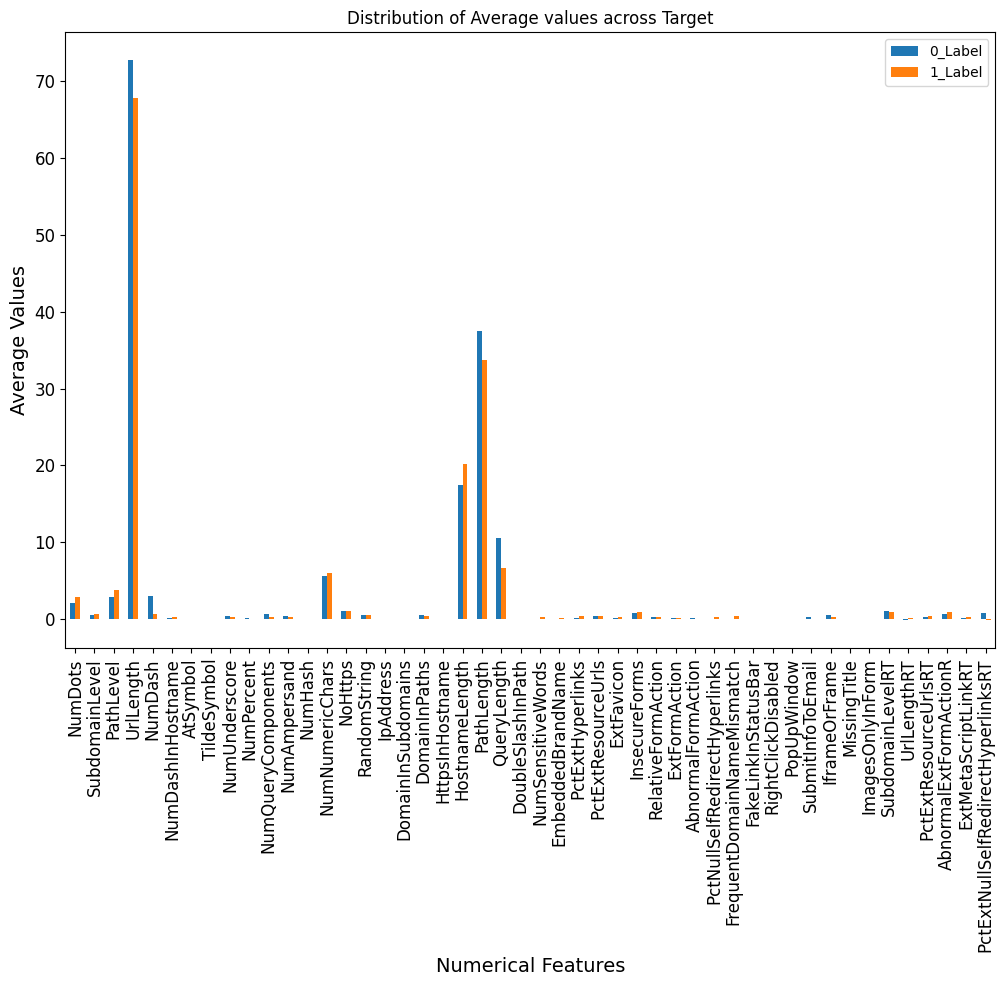

In [14]:
df_distr = data.groupby('CLASS_LABEL')[features].mean().reset_index().T
df_distr.rename(columns={0: '0_Label', 1: '1_Label'}, inplace=True)

import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'w'
ax = df_distr[1:][['0_Label', '1_Label']].plot(kind='bar', title="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
plt.show()

In [24]:
#importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#shuffling the data

from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

#Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the data into train and test sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import keras
import tensorflow as tf

model = keras.Sequential()

# Add input layer
model.add(keras.layers.Input(shape=(train_X.shape[1],)))

# Add hidden layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# Add output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_data=(val_X, val_y))

Epoch 1/10
250/250 [==============================] - 3s 6ms/step - loss: 0.2672 - accuracy: 0.8924 - val_loss: 0.1722 - val_accuracy: 0.9425
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1284 - accuracy: 0.9529 - val_loss: 0.1508 - val_accuracy: 0.9495
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9597 - val_loss: 0.1354 - val_accuracy: 0.9550
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0932 - accuracy: 0.9649 - val_loss: 0.1267 - val_accuracy: 0.9580
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0807 - accuracy: 0.9703 - val_loss: 0.1236 - val_accuracy: 0.9600
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9750 - val_loss: 0.1155 - val_accuracy: 0.9615
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9764 - val_loss: 0.1094 - val_accuracy: 0.9605
Epoch 

In [29]:
test_loss, test_accuracy = model.evaluate(val_X, val_y)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

63/63 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.9700
Test Accuracy: 97.00%


In [34]:
pred = model.predict(val_X)

63/63 [==============================] - 0s 1ms/step


In [35]:
val_y = val_y.astype(int)
pred = pred.astype(int)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


class_report = classification_report(val_y, pred, target_names=['Non-Phishing', 'Phishing'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

Non-Phishing       0.51      1.00      0.68       986
    Phishing       1.00      0.08      0.14      1014

    accuracy                           0.53      2000
   macro avg       0.76      0.54      0.41      2000
weighted avg       0.76      0.53      0.41      2000

